In [13]:
import numpy as np
import pandas as np
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [19]:
import pandas as pd  
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

display(train.head(), test.head())

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [21]:
# check info

display(train.info(), test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 n

None

None

In [23]:
# check info

display(train.info(), test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 n

None

None

In [25]:
# feature engineering

train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['weekday'] = train['datetime'].dt.weekday

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['weekday'] = test['datetime'].dt.weekday

In [27]:
# drop unnecessary columns
train.drop(['datetime', 'casual','registered'], axis=1 , inplace = True)

In [31]:
# Classifying columns by data type

col_count = []
col_num = []
col_etc = []

for col in train.columns:
    if train[col].nunique() < 20:
        col_count.append(col)
    elif train[col].dtypes in ['int32','int64','float64']:
        col_num.append(col)
    else:
        col_etc.append(col)
len(col_count), len(col_num), len(col_etc)

(8, 6, 0)

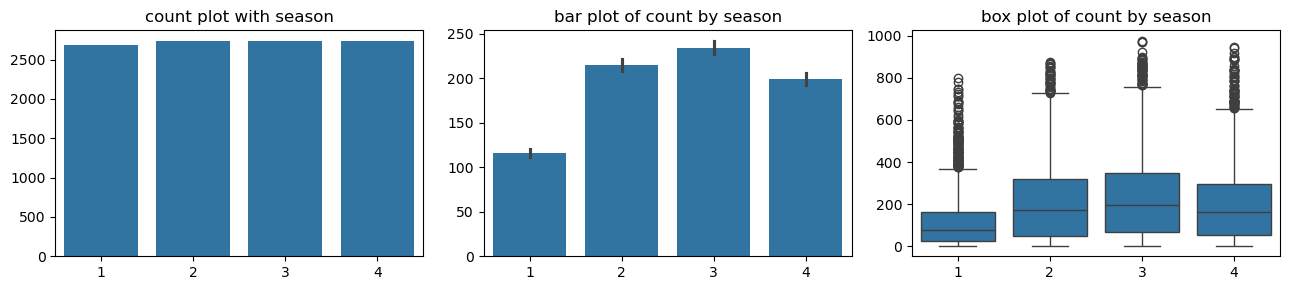

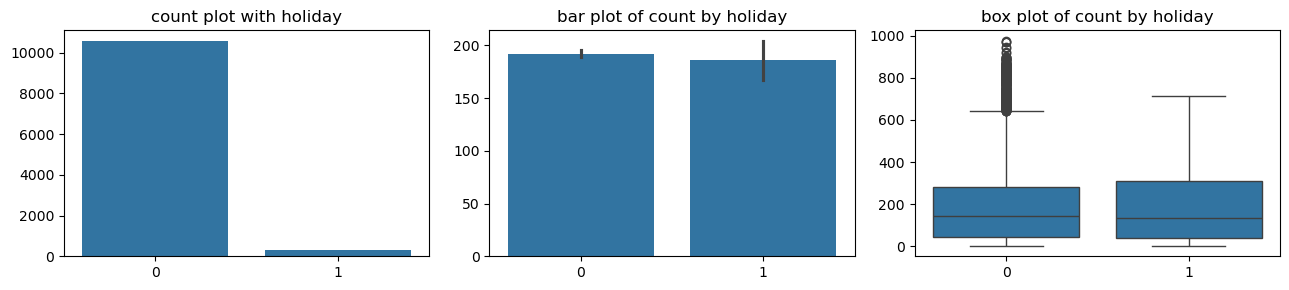

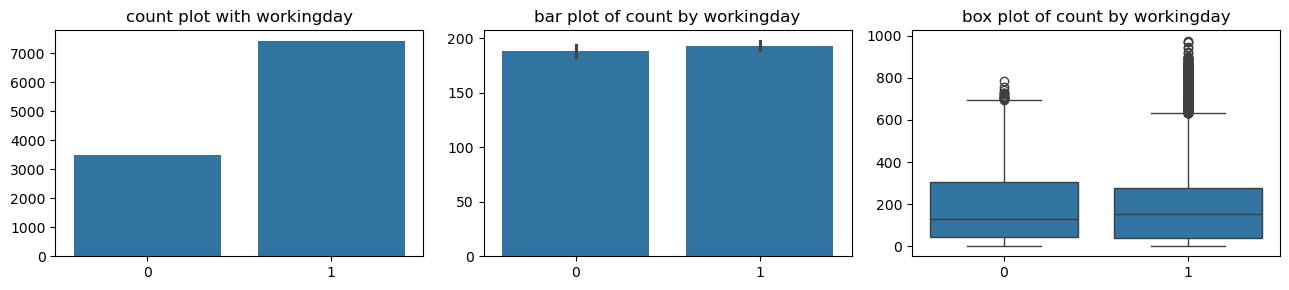

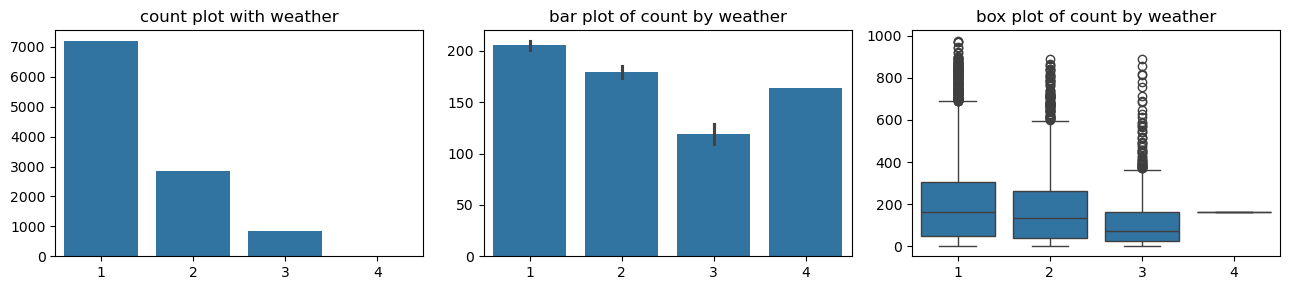

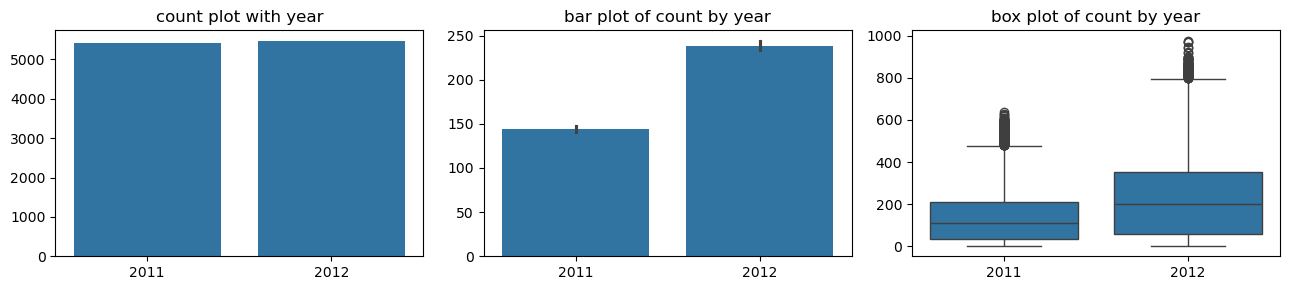

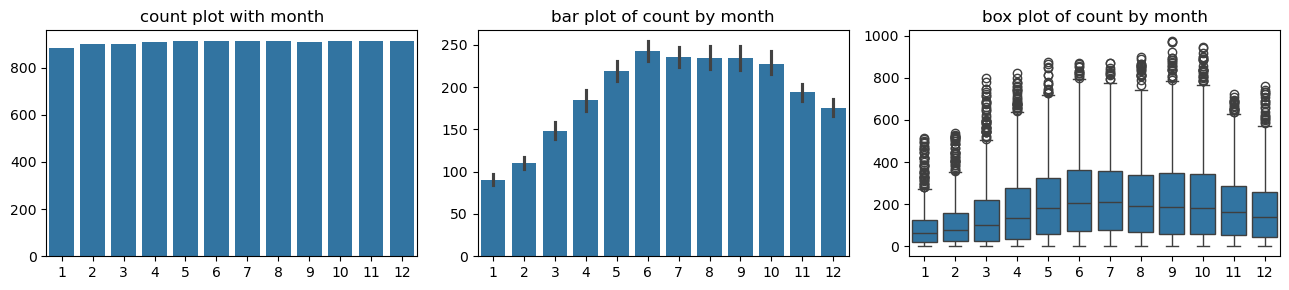

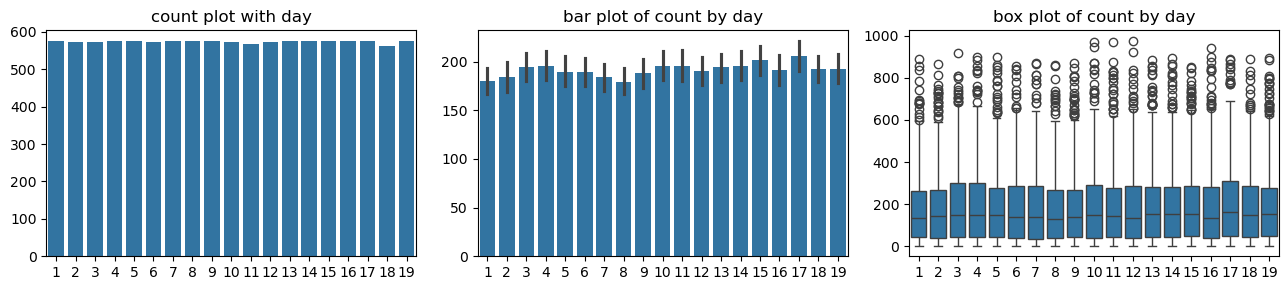

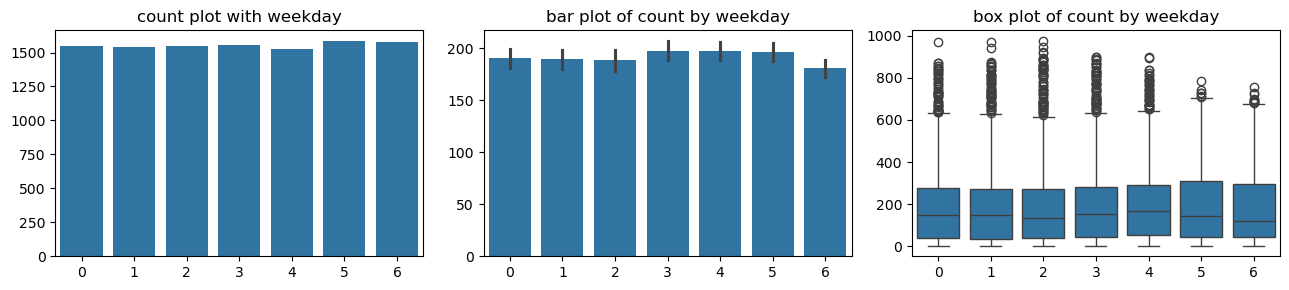

In [37]:
# Exploratory Data Analysis (EDA) through visualization

for col in col_count:
    fig, axes = plt.subplots(1,3,figsize=(13,3))
    sns.countplot(x=col, data=train, ax=axes[0])
    sns.barplot(x=col, y='count', data = train, ax=axes[1])
    sns.boxplot(x=col, y='count', data = train, ax=axes[2])
    axes[0].set_title(f'count plot with {col}')
    axes[1].set_title(f'bar plot of count by {col}')
    axes[2].set_title(f'box plot of count by {col}')
    axes[0].set_ylabel('')
    axes[1].set_ylabel('')
    axes[2].set_ylabel('')
    axes[0].set_xlabel('')
    axes[1].set_xlabel('')
    axes[2].set_xlabel('')
    plt.tight_layout()
    plt.show()

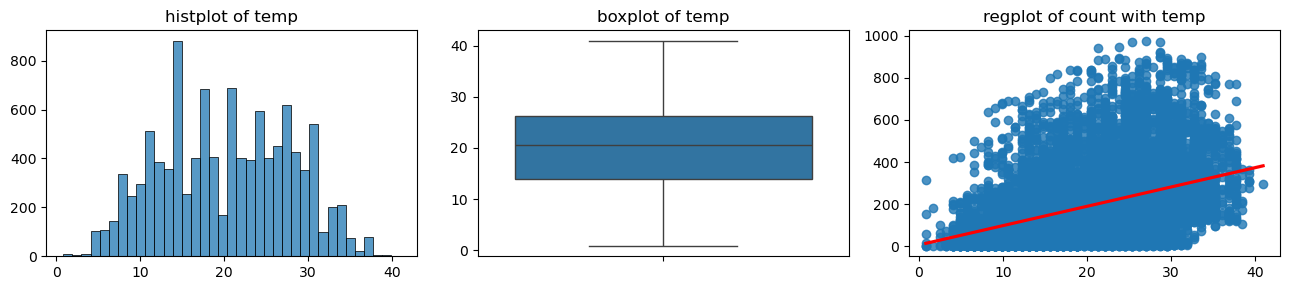

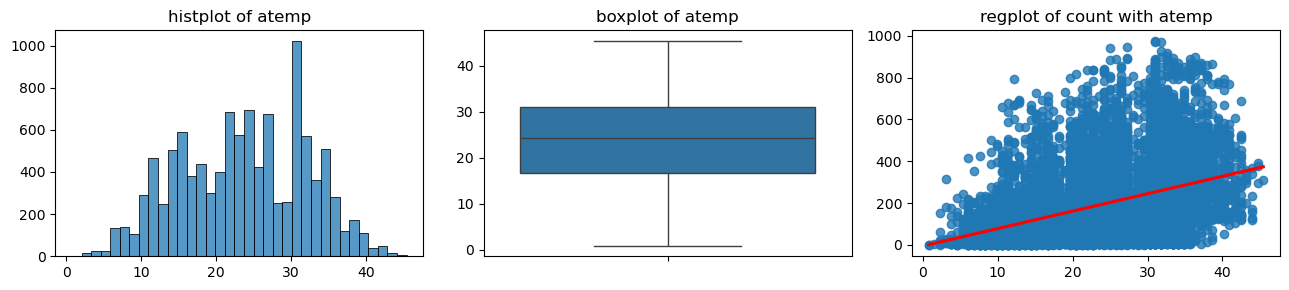

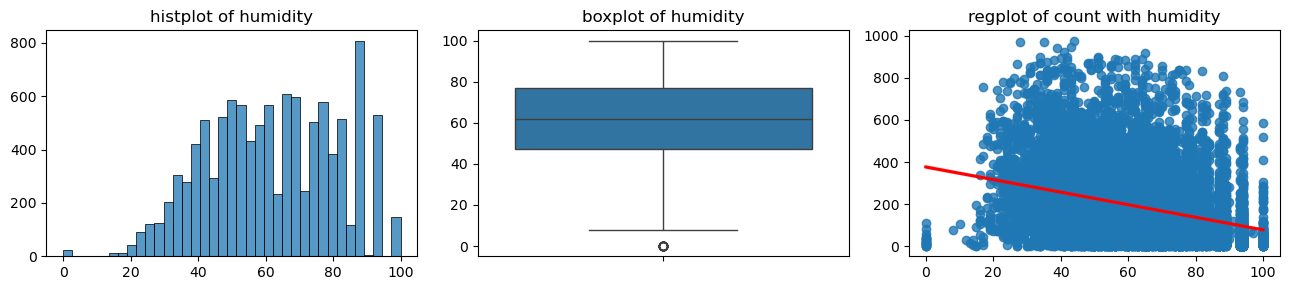

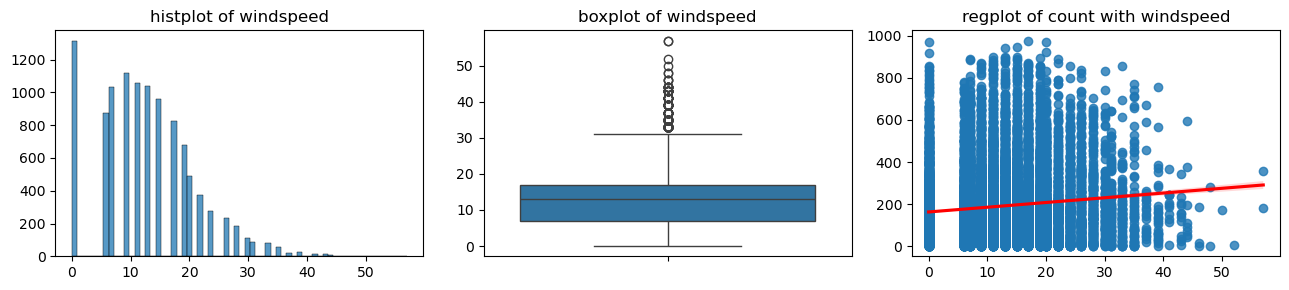

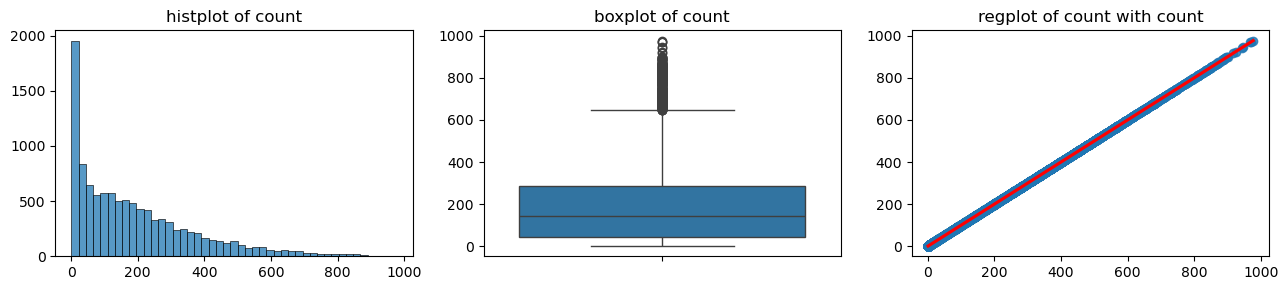

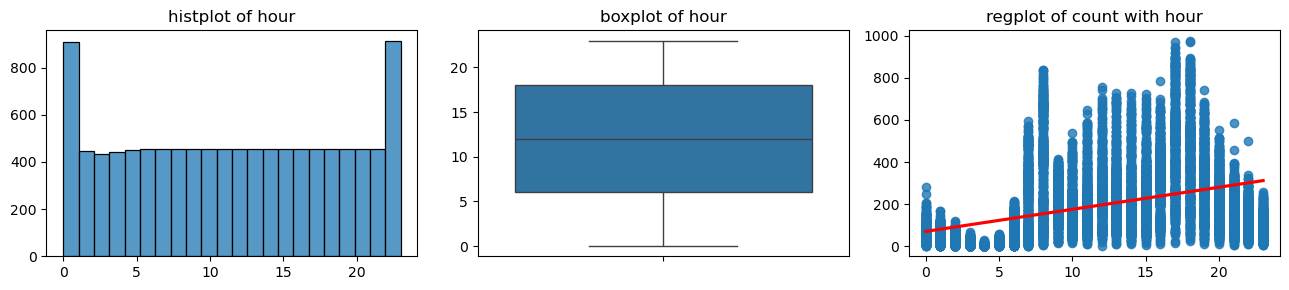

In [51]:
for col in col_num:
    fig,axes = plt.subplots(1,3, figsize=(13,3))
    sns.histplot(x=col, data = train, ax = axes[0])
    sns.boxplot(y=col, data = train, ax = axes[1])
    sns.regplot(x=col, y='count' , data = train, ax = axes[2], line_kws = {'color':'red'})
    axes[0].set_title(f'histplot of {col}')
    axes[1].set_title(f'boxplot of {col}')
    axes[2].set_title(f'regplot of count with {col}')
    axes[0].set_ylabel('')
    axes[1].set_ylabel('')
    axes[2].set_ylabel('')
    axes[0].set_xlabel('')
    axes[1].set_xlabel('')
    axes[2].set_xlabel('')
    plt.tight_layout()
    plt.show()

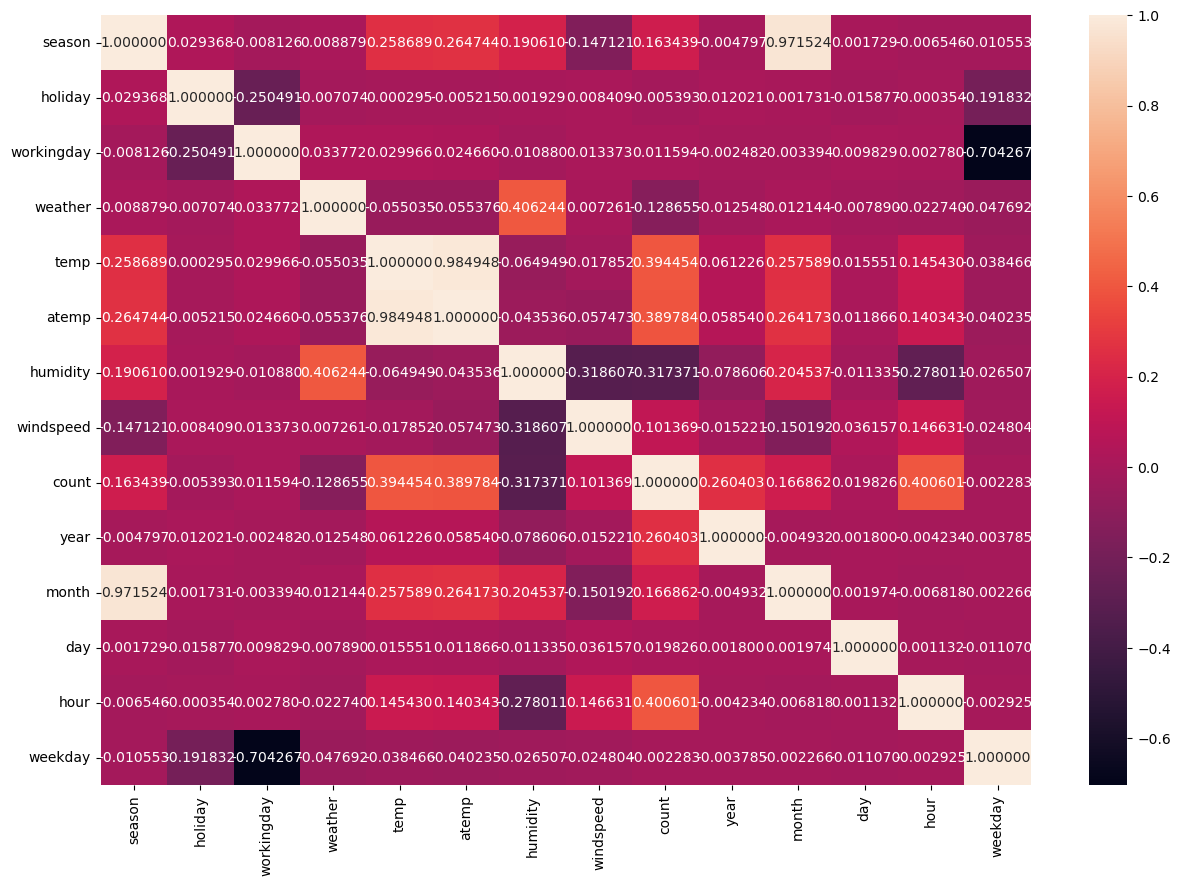

In [53]:
#Checking correlations using a heatmap

plt.figure(figsize=(15,10))
sns.heatmap(train.corr(), annot=True, fmt='2f')
plt.show()

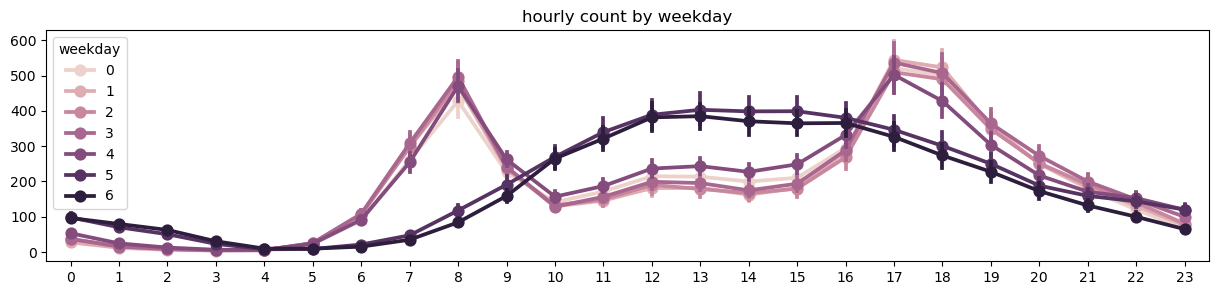

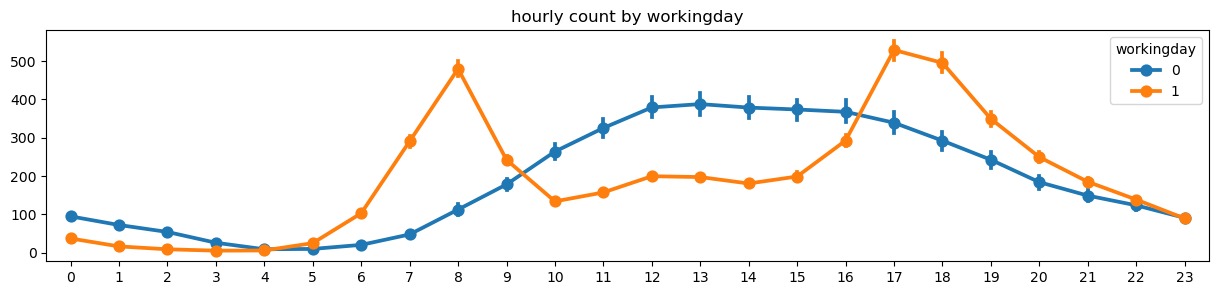

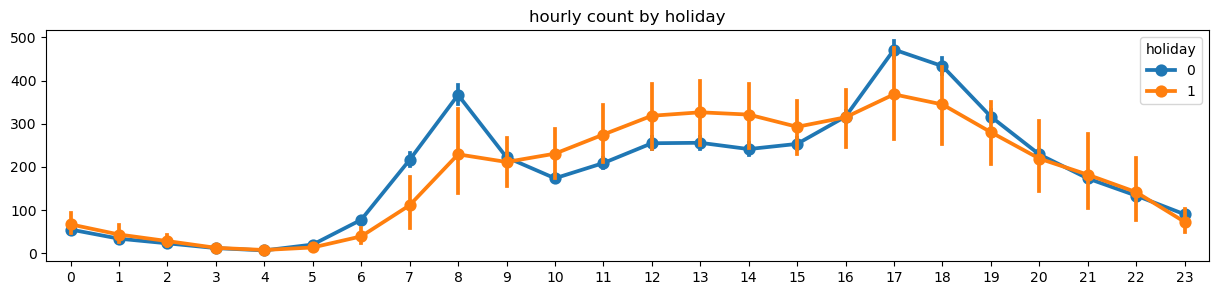

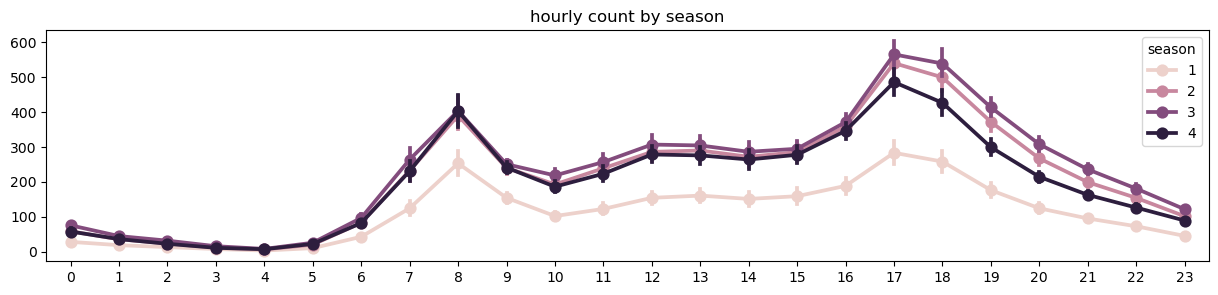

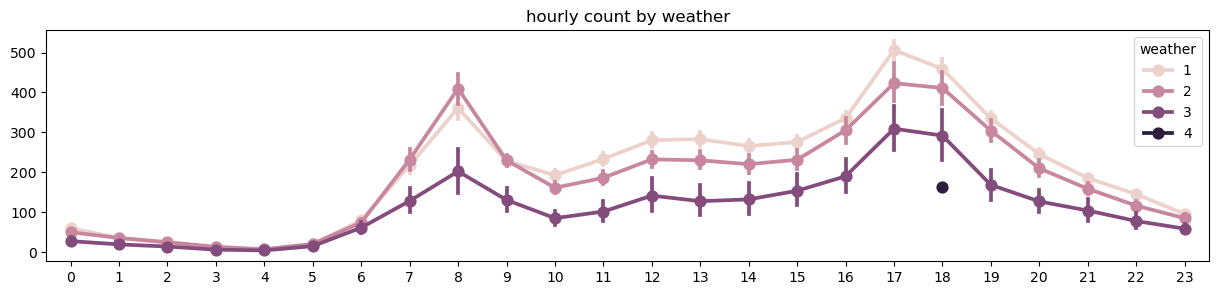

In [55]:
# hourly count by some columns

col_temp = ['weekday', 'workingday', 'holiday', 'season', 'weather']

for col in col_temp:
    plt.figure(figsize=(15,3))
    sns.pointplot(x='hour', y='count', hue=col, data = train)
    plt.ylabel('')
    plt.xlabel('')
    plt.title(f'hourly count by {col}')
    plt.show()

In [57]:
# Checking for outlier in data where the weather value is 4

train[train['weather']==4]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,weekday
5631,1,0,1,4,8.2,11.365,86,6.0032,164,2012,1,9,18,0


In [59]:
# drop outlier

train = train[train['weather']!=4]

In [65]:
import xgboost as xgb

In [71]:
# Comparison of Random Forest and XGBoost models
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_log_error, make_scorer
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# 모델 정의
model = {
    'RandomForest': RandomForestRegressor(),
    'XGB': XGBRegressor()
}

# 데이터와 타겟 설정
data = train.drop(['count'], axis=1)  # 'count' 열을 제외한 데이터
target = train['count']                # 타겟 변수
target_log = np.log1p(target)          # NumPy의 log1p 함수 사용

# RMSLE 계산 함수 정의
def rmsle(y_true, y_pred):
    y_true = np.expm1(y_true)           # 로그 변환된 값을 원래 값으로 변환
    y_pred = np.expm1(y_pred)           # 예측값도 원래 값으로 변환
    return np.sqrt(mean_squared_log_error(y_true, y_pred))  # RMSLE 계산

# RMSLE 스코어러 정의
rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

# 모델 평가
for name, model in model.items():
    score = cross_val_score(model, data, target_log, cv=5, scoring=rmsle_scorer)  # 5-fold 교차 검증
    print(f'{name}_RMSLE : {np.mean(score) * -1}')  # RMSLE 평균 출력


RandomForest_RMSLE : 0.45083019019041803
XGB_RMSLE : 0.41054853092374016


In [73]:
# Hyperparameter optimization using Optuna

# import optuna
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=0)

# y_test_log = np.log1p(y_test)
# y_train_log = np.log1p(y_train)

# def objective(trial):
#     param = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#         'max_depth': trial.suggest_int('max_depth', 3, 12),
#         'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-1, log=True),
#         'subsample': trial.suggest_float('subsample', 0.6, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
#         'gamma': trial.suggest_float('gamma', 0, 5),
#         'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
#         'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True)
#     }

#     model = XGBRegressor(**param, random_state=42)
#     model.fit(X_train, y_train_log, eval_set=[(X_test, y_test_log)], verbose=False)

#     preds = model.predict(X_test)
#     preds_exp = np.expm1(preds)

#     rmsle = np.sqrt(mean_squared_log_error(y_test,preds_exp))

#     return rmsle

# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100)

# print("Best trial:")
# trial = study.best_trial
# print(f"  Value: {trial.value}")
# print("  Params: ")
# for key, value in trial.params.items():
#     print(f"    {key}: {value}")

In [75]:
# Modeling and validation using optimized parameters

best_params = {
      'n_estimators': 973,
      'max_depth': 5,
      'learning_rate': 0.0276061670314364,
      'subsample': 0.7326901697354489,
      'colsample_bytree': 0.7810298851531396,
      'gamma': 0.06562510648004544,
      'reg_alpha': 0.0019110789512788793,
      'reg_lambda': 3.923321423779548e-06
  } 

xgb_bestparam = XGBRegressor(**best_params)

score = cross_val_score(xgb_bestparam, data, target_log, cv=5, scoring=rmsle_scorer)
print(f'xgb_best_params_RMSLE:{np.mean(score)*-1}')

xgb_best_params_RMSLE:0.37820428395259503


In [81]:
# final submission

xgb_bestparam.fit(data, target_log)
pred_log = xgb_bestparam.predict(test.drop(['datetime'],axis=1))
pred = np.expm1(pred_log)
test['count'] = pred
test[['datetime','count']].to_csv('submission_20241028_3.csv', index=False)

ValueError: feature_names mismatch: ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour', 'weekday'] ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour', 'weekday', 'count']
training data did not have the following fields: count